<a href="https://colab.research.google.com/github/kevieilish/Book-Recommendation-System/blob/main/BookRecommendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PROBLEM STATEMENT

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).

Recommendation systems are used in hundreds of different services - everywhere from online shopping to music to movies. Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors.

The main objective of our project is to create book recommendation systems for users on various approaches 


### Data Description

our books dataset contain 3 files 

1 -  Users 
Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

2- Books
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

3 - Ratings 
Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

In [1]:
# importing important libraries

import numpy as np
import pandas as pd 
from numpy import math
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

In [3]:
# loading all of our datasets

dataset1 = pd.read_csv('/content/Books.csv')
dataset2 = pd.read_csv('/content/Ratings.csv')
dataset3 = pd.read_csv('/content/Users.csv')

In [4]:
# now creating a copy of dataset to work on it

books = dataset1.copy()
ratings = dataset2.copy()
users = dataset3.copy()

### Dataset Overview

In [5]:
#display first five rows of books dataset
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


books dataset contains all the information related to books like ISBN usually used for identification,title of the book,when was book published and image urls obtained from amazon website.

In [6]:
#To display first five rows of ratings dataset
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


Rating Dataframe contain ratings for our books

In [7]:
#To display first five rows of users dataset
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


users dataset contains unique user IDs for each user with their location and Age. Also we can see some null values in this dataset

In [8]:
# checking shape of data
print(f"Shape of books dataset: {books.shape}")
print(f"Shape of ratings dataset: {ratings.shape}")
print(f"Shape of users dataset: {users.shape}")


Shape of books dataset: (271360, 8)
Shape of ratings dataset: (111190, 3)
Shape of users dataset: (278858, 3)


### Data Preprocessing

---



---


#### Books


In [9]:
# first work on books dataset

# info. of books dataset
books.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [10]:
# Drop URL columns
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)
books.head()


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [11]:
# to get descriptive summary about our dataset
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
count,271360,271360,271359,271360,271358
unique,271360,242135,102023,202,16807
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin
freq,1,27,632,13903,7535


In [12]:
# missing value counts in differenct feature columns of book dataset

books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

2 values are missing in Publishers column and 1 in Book-Author. we can fill this with "other".

In [13]:
# Replacing missing values with "other"
books["Book-Author"].fillna("other", inplace = True)  
books["Publisher"].fillna("other", inplace = True)


In [14]:
# To count the duplicated values 
books.duplicated().value_counts()

False    271360
dtype: int64

In [15]:
# Checking unique values
books.nunique()

ISBN                   271360
Book-Title             242135
Book-Author            102024
Year-Of-Publication       202
Publisher               16808
dtype: int64

In [16]:
#insepcting the values in year of publication
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

Name of few publication companies have been incorrectly put in this column.There are values such as 0 ,2024,2030 etc. which is also not possible .Let's rectify these mistakes



In [17]:
# correcting this error
books[books['Year-Of-Publication'] == 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [18]:
# on searching for these  books we came to know about its authors
#ISBN '078946697X'
books.loc[books.ISBN == '078946697X','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#ISBN '0789466953'
books.loc[books.ISBN == '0789466953','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '0789466953','Book-Author'] = "James Buckley"
books.loc[books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"

In [19]:
#checking the rows having 'Gallimard' as yearOfPublication
books.loc[books['Year-Of-Publication'] == 'Gallimard',:]


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [20]:
books.loc[books.ISBN=='2070426769','Year-Of-Publication']=2003
books.loc[books.ISBN=='2070426769','Book-Author']='Jean-Marie Gustave Le ClÃ?Â©zio'
books.loc[books.ISBN=='2070426769','Publisher']='Gallimard'
books.loc[books.ISBN=='2070426769','Book-Title']="Peuple du ciel, suivi de 'Les Bergers"


In [21]:
# now as we know year of publication column was object type and we need to convert into int type for further work 

# changing dtype of year of publication
books['Year-Of-Publication'] =books['Year-Of-Publication'].astype(int)

In [22]:
print(sorted(books['Year-Of-Publication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


The value 0 for Year-Of_Publication is invalid. Since current year is 2022, we have assumed that the years after 2022 to be invalid and setting invalid years as NaN. So that it can be trated with missing values.

In [23]:
# Replacing invalid year with NaN
books.loc[(books['Year-Of-Publication'] > 2022) | (books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

In [24]:
# Replacing NaNs with median value of Year-Of-Publication
books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].median()),inplace=True)

In [25]:
# now check again year of publication column values
books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].median()),inplace=True)

In [26]:
# now inspecting other unique value count columns 

books['Book-Author'].value_counts()

Agatha Christie         632
William Shakespeare     567
Stephen King            524
Ann M. Martin           423
Carolyn Keene           373
                       ... 
R. Gelman                 1
Ellery R. Sheets          1
Artiste C. Arthur         1
Emily Pearl Kingsley      1
Christopher  Biffle       1
Name: Book-Author, Length: 102022, dtype: int64

In [27]:
books['Book-Author'].unique()

array(['Mark P. O. Morford', 'Richard Bruce Wright', "Carlo D'Este", ...,
       'David Biggs', 'Teri Sloat', 'Christopher  Biffle'], dtype=object)

In [28]:
books['Publisher'].value_counts()

Harlequin                        7535
Silhouette                       4220
Pocket                           3905
Ballantine Books                 3783
Bantam Books                     3646
                                 ... 
Windstream Publishing Company       1
Polaris Books                       1
Hannover House                      1
Amber Quill Press, LLC.             1
Connaught                           1
Name: Publisher, Length: 16805, dtype: int64

In [29]:
books['Publisher'].unique()


array(['Oxford University Press', 'HarperFlamingo Canada',
       'HarperPerennial', ..., 'Tempo', 'Life Works Books', 'Connaught'],
      dtype=object)

In [30]:
#Checking for duplicates in books_df
books[books.duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher


#### USERS DATA

In [31]:
# User data info
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB



*   User dataset has 278858 users and there are 3 columns in this dataframe
*   The 'Age' column has null values

In [32]:
# Checkig null values exist in user data
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [33]:
# data description 
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


We have a lot of missing values in age column. 
Maximum age is 244  and minimun is 0 which are outliers



Text(0.5, 1.0, 'Age Distribution Plot')

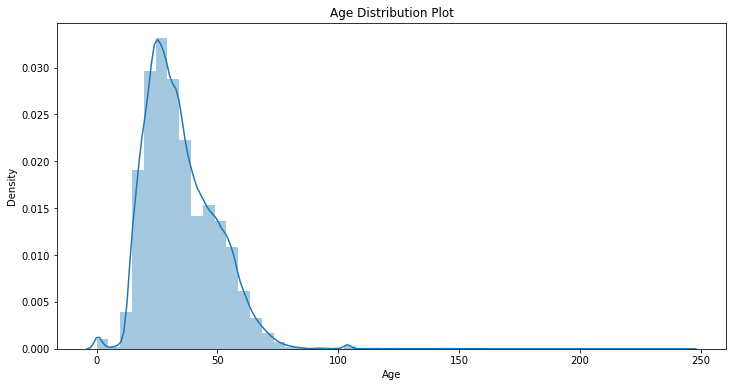

In [34]:
#Histogram showing distribution of ages
fig=plt.figure(figsize=(12,6))
sns.distplot(users.Age)
plt.title('Age Distribution Plot')

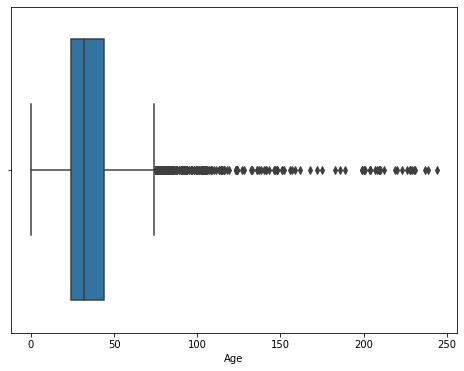

In [35]:
#boxplot of Age column
fig = plt.figure(figsize=(8,6))
sns.boxplot(x='Age',data=users)

Our histogram and box plot show our data distrubtion is mostly scattered aroun 20-60 age , and boc plot showing our outliers values

In [36]:
# Dealing with outliers
median = float(users['Age'].median())
users["Age"] = np.where((users["Age"] > 80)|(users['Age']<4), median, users['Age'])


In [37]:
# dealing with missing values
users["Age"].fillna(users.Age.mean(),inplace=True)

In [38]:
# Checking location
users.Location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [39]:
#number of unique values in 'Location'
users['Location'].nunique()

57339

In [40]:
# Checking location
users.Location.value_counts()

london, england, united kingdom                  2506
toronto, ontario, canada                         2250
sydney, new south wales, australia               1744
melbourne, victoria, australia                   1708
portland, oregon, usa                            1629
                                                 ... 
gneisenaustr. 3, nordrhein-westfalen, germany       1
-, bayern, germany                                  1
bouchegouf, guelma, algeria                         1
indiana and philadelphia, pennsylvania, usa         1
tacoma, washington, united kingdom                  1
Name: Location, Length: 57339, dtype: int64

In [41]:
#extracting the country names from users
for i in users:
    users['Country']=users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')
#Displaying the country names
set(users['Country'])

{'',
 '01776',
 '02458',
 '19104',
 '23232',
 '30064',
 '85021',
 '87510',
 '_ brasil',
 'a',
 'aaa',
 'adsgfdr',
 'afghanistan',
 'ahrensburg',
 'alachua',
 'albania',
 'alderney',
 'algeria',
 'algérie',
 'allen',
 'ama lurra',
 'america',
 'american samoa',
 'andorra',
 'angola',
 'antarctica',
 'aotearoa',
 'argentina',
 'armenia',
 'aroostook',
 'aruba',
 'asturies',
 'auckland',
 'austbritania',
 'australia',
 'australii',
 'austria',
 'autralia',
 'az',
 'azerbaijan',
 'bademn würtemberg',
 'bahamas',
 'bahrain',
 'baltimore',
 'bangladesh',
 'barbados',
 'basilicata',
 'basque country',
 'bavaria',
 'baxter',
 'bbbzzzzz',
 'belarus',
 'belgi',
 'belgique',
 'belgium',
 'belize',
 'bell',
 'benin',
 'berguedà',
 'bermuda',
 'bernalillo',
 'bfe',
 'bhutan',
 'bih',
 'bkk',
 'bladen',
 'bolivia',
 'bosnia',
 'botswana',
 'brasil',
 'brazil',
 'brunei',
 'brunei darussalam',
 'bucks',
 'bulgaria',
 'buncombe',
 'burkina faso',
 'burkinafasu',
 'burlington',
 'burma',
 'butler',
 'c

In [42]:
#correcting the mispelled country names
users.loc[users['Country'].isin(['australii','autralia','western australia']), 'Country'] = 'australia'
users.loc[users['Country'].isin(['unite states','01776','02458','19104','23232','30064','85021','87510','united sates','united staes','united state','united statea','united stated','america'
                                      'united stated of america','united states','united states of america','us','us of a','us virgin islands',
                                      'usa  canada','usa currently living in england','uusa','usaa','wonderful usa','california','orange co']), 'Country'] = 'usa'
users.loc[users['Country'].isin(['united kindgdom', 'united kindgonm','united kingdom','u k']), 'Country'] = 'uk'  
users.loc[users['Country'].isin(['the philippines', 'philippines', 'philippinies', 'phillipines', 'phils', 'phippines']), 'Country'] = 'philippines'                                      
users.loc[users['Country'].isin(['','xxxxxx','universe','nowhere','x','y','a','öð¹ú','the','unknown',np.nan,'n/a','aaa','z','somewherein space']), 'Country'] = 'others'
users.loc[users['Country'].isin([ 'italia','italien','itlay']), 'Country'] = 'italy'
users.loc[users['Country'].isin([ ' china öð¹ú','chinaöð¹ú','chian']), 'Country'] = 'china'
users['Country'].replace([ 'the gambia','the netherlands','geermany','srilanka','saudia arabia','brasil','_ brasil','indiai','malaysian','hongkong','russian federation'], 
                            ['gambia','netherlands','germany','sri lanka','saudi arabia','brazil','brazil','india','malaysia','hong kong','russia'])

0              usa
1              usa
2           russia
3         portugal
4               uk
            ...   
278853         usa
278854          uk
278855      canada
278856         usa
278857     ireland
Name: Country, Length: 278858, dtype: object

In [43]:
#Converting the country names to uppercase
users['Country']=users['Country'].str.upper()

In [44]:
#Dropping the column 'Location'
users.drop('Location',axis=1,inplace=True)

In [45]:
users.columns

Index(['User-ID', 'Age', 'Country'], dtype='object')

In [46]:
users.Country.value_counts()

USA         139746
CANADA       21658
UK           18565
GERMANY      17073
SPAIN        13258
             ...  
CARTER           1
MYANMAR          1
RAPIDES          1
ESSEX            1
HERNANDO         1
Name: Country, Length: 483, dtype: int64

### Ratings 

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

In [47]:
#displaying  5 random rows
ratings.sample(5)

,User-ID,ISBN,Book-Rating
93051,20871,8807813645,0.0
93355,20995,044661193X,0.0
4674,278418,0307070468,0.0
13636,1848,0441104029,0.0
68896,14422,0425121631,0.0


In [48]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111190 entries, 0 to 111189
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   User-ID      111190 non-null  int64  
 1   ISBN         111190 non-null  object 
 2   Book-Rating  111189 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ MB


In [49]:
# checking null values
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    1
dtype: int64

In [50]:
## checking for duplicates
ratings[ratings.duplicated()].sum()

User-ID        0.0
ISBN           0.0
Book-Rating    0.0
dtype: float64

Our ratings dataset has no null and no duplicate sample rows

In [51]:
# Checking unique values
ratings.nunique()

User-ID        10352
ISBN           69763
Book-Rating       11
dtype: int64

Our Book-Ratings has 11 unique values .
implicit ratings = (0-10)
explicit ratings = (1-10)

In [52]:
# making all the ISBN no. uppercase
ratings['ISBN'].apply(lambda x: x.upper())

0         034545104X
1         0155061224
2         0446520802
3         052165615X
4         0521795028
             ...    
111185    0446530387
111186    0525401156
111187    0671019074
111188    0671792393
111189    0679450548
Name: ISBN, Length: 111190, dtype: object

In [53]:
# Checking 11 rating values
book_ratings = ratings['Book-Rating'].unique()
book_ratings

array([ 0.,  5.,  3.,  6.,  8.,  7., 10.,  9.,  4.,  1.,  2., nan])

Text(0.5, 1.0, 'Implicit Ratings')

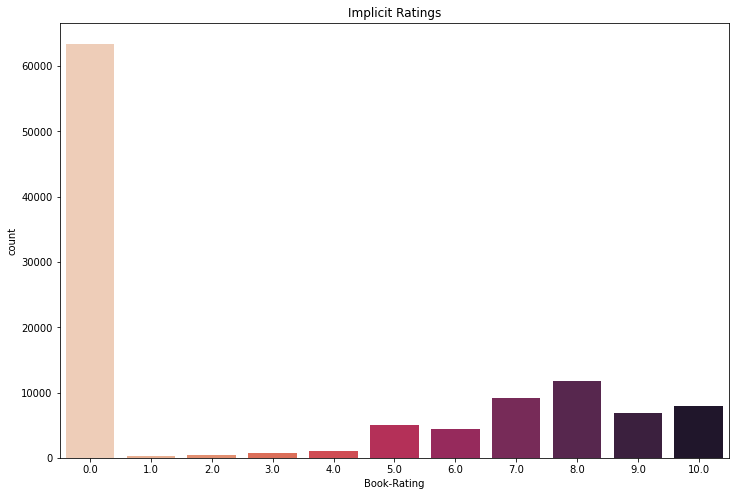

In [54]:
# Plotting Implict rating
plt.figure(figsize=(12,8))
sns.countplot(x="Book-Rating", data=ratings, palette='rocket_r')
plt.title("Implicit Ratings")

We can easily observe that our ratings are very unevenly distributed, and the vast majority of ratings are 0.
As mentoined in the description of the Rating Dataset, Book-Ratings contains the book rating information. Ratings are either explicit, expressed on a scale from 1-10 higher values denoting higher appreciation, or implicit, expressed by 0.
Hence, we need to segragate implicit and explict ratings datasets

In [55]:
#segragating implicit and explict ratings datasets
ratings_explicit = ratings[ratings['Book-Rating'] != 0]
ratings_implicit = ratings[ratings['Book-Rating'] == 0]


In [56]:
print('Shape of explicit rating: {} and implicit rating: {}'.format(ratings_explicit.shape, ratings_implicit.shape))

Shape of explicit rating: (47734, 3) and implicit rating: (63456, 3)


Text(0.5, 1.0, 'Explicit Ratings')

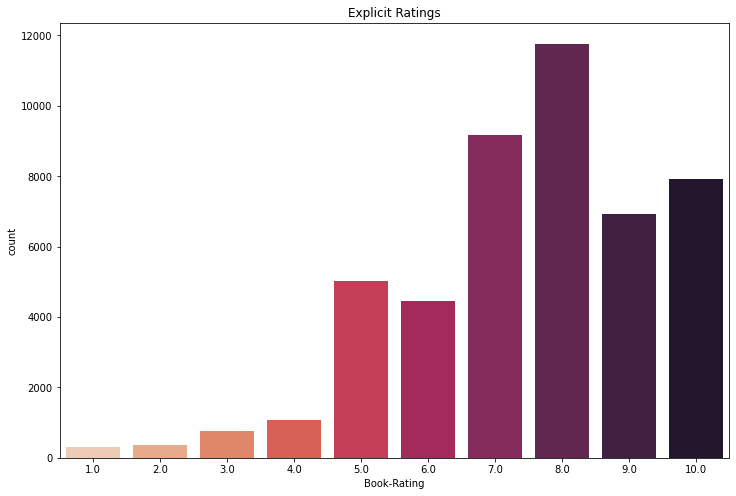

In [57]:
plt.figure(figsize=(12,8))
ratings_explicit = ratings[ratings['Book-Rating'] != 0]

sns.countplot(x="Book-Rating", 
              data=ratings_explicit,
              palette='rocket_r')

plt.title("Explicit Ratings")

In [58]:
# Checking rating count per books
rating_count = pd.DataFrame(ratings_explicit.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating', ascending=False).head()

,Book-Rating
ISBN,
0316666343,68
0385504209,48
0971880107,47
0060928336,38
0312195516,36


### Merge Dataset: Books, Users & Ratings
we are done with preprocessing and analysing all 3 data individually. Now we'll merge them togeather, perform multivariate analysis and build models.

---



---



In [59]:
# Merging all 3 datasets
df = users.copy()
df = pd.merge(df, ratings_explicit, on="User-ID")
df = pd.merge(df, books, on="ISBN")

our final dataset is called df , and it has columns provided in all 3 datasets .

In [60]:
# Look into data
df.head()

,User-ID,Age,Country,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,8,34.650343,CANADA,0002005018,5.0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
1,11676,34.650343,OTHERS,0002005018,8.0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,8,34.650343,CANADA,074322678X,5.0,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner
3,8,34.650343,CANADA,0887841740,5.0,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press
4,8,34.650343,CANADA,1552041778,5.0,Jane Doe,R. J. Kaiser,1999.0,Mira Books


In [61]:
df.describe()

,User-ID,Age,Book-Rating,Year-Of-Publication
count,40988.000000,40988.000000,40987.000000,40988.000000
mean,26732.236557,34.885307,7.576183,1995.520860
std,58707.804431,9.138775,1.849421,7.377822
min,8.000000,7.000000,1.000000,1904.000000
25%,8681.000000,31.000000,7.000000,1993.000000
50%,11924.000000,34.650343,8.000000,1997.000000
75%,19974.000000,35.000000,9.000000,2001.000000
max,278854.000000,80.000000,10.000000,2005.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40988 entries, 0 to 40987
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User-ID              40988 non-null  int64  
 1   Age                  40988 non-null  float64
 2   Country              40988 non-null  object 
 3   ISBN                 40988 non-null  object 
 4   Book-Rating          40987 non-null  float64
 5   Book-Title           40988 non-null  object 
 6   Book-Author          40988 non-null  object 
 7   Year-Of-Publication  40988 non-null  float64
 8   Publisher            40988 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 3.1+ MB


In [63]:
# Checking null values
df.isnull().sum()

User-ID                0
Age                    0
Country                0
ISBN                   0
Book-Rating            1
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

### EDA

Text(0.5, 1.0, '\nMost popular books\n')

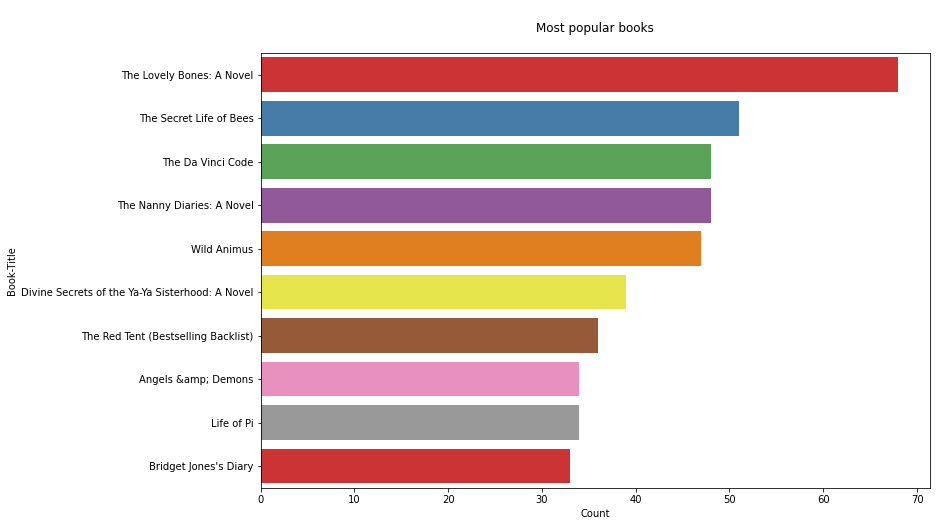

In [64]:
# top 10 most popular books
plt.figure(figsize = (12,8))
popular = df.groupby('Book-Title')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]
popular.columns = ['Book-Title', 'Count']
ax=sns.barplot(data=popular, y='Book-Title', x='Count',palette='Set1')
plt.title('\nMost popular books\n')



We can see that he book which has been rated by most number of users is 'The Lovely Bones' followed by 'Wild Animus' and 'The Vinci Code'

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

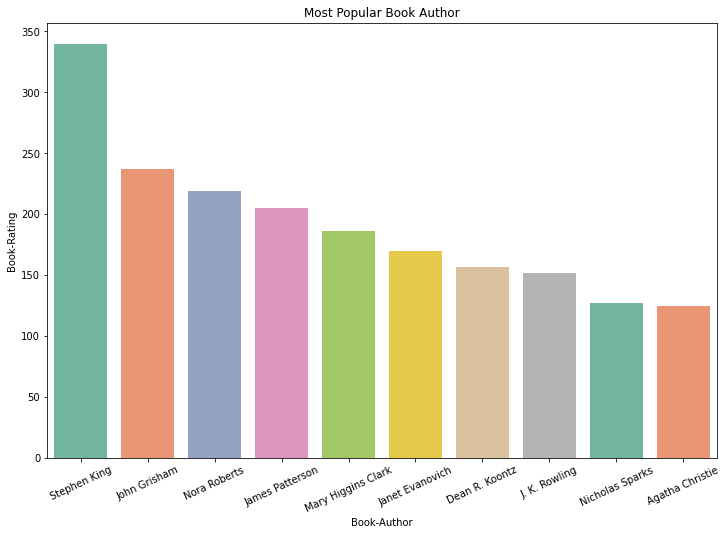

In [65]:
# most popular book authors
author = df.groupby('Book-Author')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]
plt.figure(figsize=[12, 8])

ax = sns.barplot(data=author, x='Book-Author', y='Book-Rating',palette='Set2')
ax.set_title('Most Popular Book Author', fontsize=12)
plt.xticks(fontsize=10,rotation=25) 

Stephen King has received maximum number of rating by the users. It seems he is more popular among readers followed by Nora Roberts and John Grisham

Text(0.5, 1.0, 'Most famous Publishers')

<Figure size 576x360 with 0 Axes>

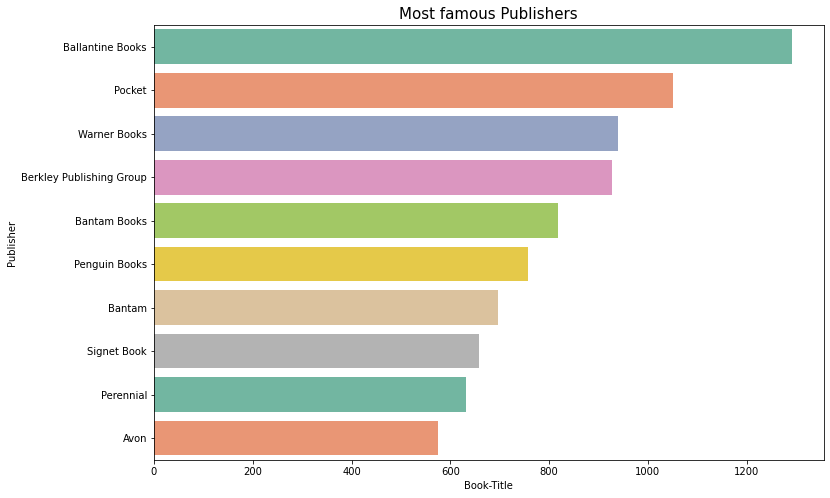

In [66]:
# Publisher with most books

publishers = df.groupby('Publisher')['Book-Title'].count().reset_index().sort_values(by='Book-Title', ascending=False)[:10]
plt.figure(figsize=[8, 5])

plt.figure(figsize=(12,8))
ax=sns.barplot(data=publishers, x='Book-Title', y='Publisher',palette='Set2')
ax.set_title('Most famous Publishers', fontsize=15)

Here we have top-10 most rated Publishers. Ballantine Books received maximum attention by the users followed by Rocket and Barkley Publishing Group

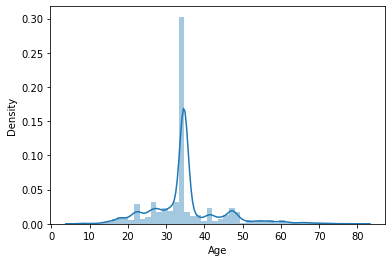

In [67]:
#Age distribution of users
#age_df=users_df[users_df['User-ID'].isin(list(df['User-ID'].unique()))]
#sns.distplot(age_df.Age)

sns.distplot(df.Age)

Text(0.5, 1.0, 'Total users in a country')

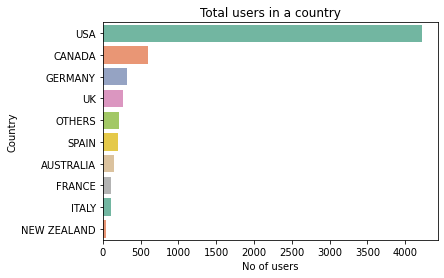

In [68]:
# countries with most readers
countries = df.groupby('Country')['User-ID'].nunique().reset_index().sort_values(by='User-ID', ascending=False)[:10]
sns.barplot(data=countries, y='Country', x='User-ID',palette='Set2')
plt.xlabel('No of users')
plt.title('Total users in a country')

Most of the readers are from the United States

In [69]:
#How many users have rated atleast 1 book?
df['User-ID'].value_counts()

11676     6943
23902     1180
16795      959
23872      478
7346       314
          ... 
21737        1
278024       1
11272        1
5757         1
278777       1
Name: User-ID, Length: 6618, dtype: int64

There are 68080 users who have rated atleast one book